In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

**Importing the dataset**

In [7]:
df = pd.read_csv("Social_Network_Ads.csv")

In [8]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [9]:
x = df.iloc[:,[2,3]].values
y = df.iloc[:,4].values

**Splitting the dataset into the Training set and Test set**

In [10]:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

**Feature Scaling**

In [11]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

**Fitting Decision Tree Classification to the Training set**

In [16]:
from sklearn.tree import DecisionTreeClassifier
DTmodel = DecisionTreeClassifier(criterion='entropy',random_state=0)
DTmodel.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

**Predicting the Test set results**

In [17]:
predictions = DTmodel.predict(x_test)

**Making the Confusion Matrix**

In [18]:
print(confusion_matrix(y_test,predictions))

[[62  6]
 [ 3 29]]


**Visualising the Training set results**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


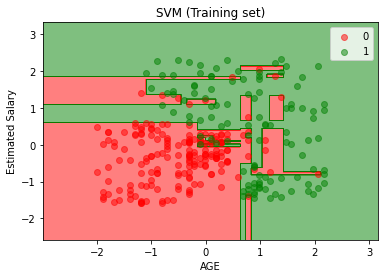

In [20]:

from matplotlib.colors import ListedColormap
X_set,y_set=x_train,y_train
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                  np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,DTmodel.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha=0.5,cmap=ListedColormap(("red","green")))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],alpha=0.5,
              c=ListedColormap(("red","green"))(i),label=j)
plt.title("SVM (Training set)")
plt.xlabel("AGE")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()


**Visualising the Test set results**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


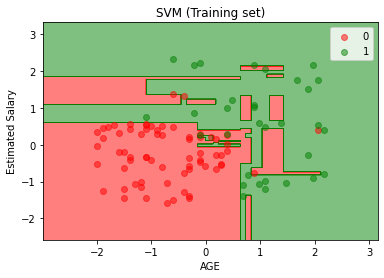

In [21]:

from matplotlib.colors import ListedColormap
X_set,y_set=x_test,y_test
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                  np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,DTmodel.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha=0.5,cmap=ListedColormap(("red","green")))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],alpha=0.5,
              c=ListedColormap(("red","green"))(i),label=j)
plt.title("SVM (Training set)")
plt.xlabel("AGE")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()
